In [1]:
import os

# data storage and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from indoorplants.analysis import exploratory
from indoorplants.validation import crossvalidate, curves, boundaries
from indoorplants.analysis import wrangle



#modeling and validation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


#linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

#Tree based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#feature selection 
from sklearn.feature_selection import SelectFromModel



%matplotlib inline

****
# Housing Price Prediction
## Overview

**Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data**

This project will be focusing on applying python library `indoorplants` functions on solving a regression type of problem. There are mainly 3 steps in this project, including data cleaning, data exploration, and data modeling. 
****

   # Step 1. Data Selection and Preprocessing

## 1.1 Retrieve

In [2]:
data_dir = os.path.join(
                    os.path.dirname(
                        os.path.dirname(
                            os.getcwd())),
                    "datasets",
                    "housing_price_prediction")

In [3]:
data_dir

'/Users/francescao/2019SummerProjects/indoorplants_frances/datasets/housing_price_prediction'

In [4]:
train_path = os.path.join(data_dir, "train.csv")

In [5]:
train_path

'/Users/francescao/2019SummerProjects/indoorplants_frances/datasets/housing_price_prediction/train.csv'

In [6]:
table_train = pd.read_csv(train_path)

In [7]:
table_train.shape

(1460, 81)

In [8]:
test_path = os.path.join(data_dir, "test.csv")

In [9]:
test_path

'/Users/francescao/2019SummerProjects/indoorplants_frances/datasets/housing_price_prediction/test.csv'

In [10]:
table_test = pd.read_csv(test_path)

In [11]:
table_test.shape

(1459, 80)

## 1.2 Check



In [12]:
test_null_stats = wrangle.get_null_stats(table_test)

In [13]:
table_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
table_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### 1.2.1 Shape

In [15]:
table_train.shape

(1460, 81)

In [16]:
table_train.dtypes.count()

81

In [17]:
table_test.shape

(1459, 80)

In [18]:
table_test.dtypes.count()

80

#### 1.2.2 Duplicates

In [19]:
len(table_train[table_train.duplicated()])

0

In [20]:
len(table_test[table_test.duplicated()])

0

#### 1.2.3 Nulls

In [21]:
train_null_stats = wrangle.get_null_stats(table_train)

In [22]:
train_null_stats[train_null_stats.cnt != 0]

,cnt,ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [23]:
train_null_stats[train_null_stats.cnt != 0].count()

cnt      19
ratio    19
dtype: int64

19 out of 81 features in the **Train dataset** have nulls. Let's take a look of **Test dataset**.

In [24]:
test_null_stats = wrangle.get_null_stats(table_test)

In [25]:
test_null_stats[test_null_stats.cnt != 0]

,cnt,ratio
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [26]:
test_null_stats[test_null_stats.cnt != 0].count()

cnt      33
ratio    33
dtype: int64

33 out of 80 features have nulls in **test dataset**. 

We need to take a look of them one by one. 

**Notes**
- from an engineering perspective, it's nice to leave missing values in  categorical field as missing
- this leads to nice consistency (i.e. forget about `"N/A"` vs. `"NA"` vs. `0`, b/c missing is _always_ just `null`)
- also, when you one-hot / dummy encode a categorical variable, it's standard practice to drop one value
- this is so as to avoid redundancy or inter-dependence in your features, which can lead to over-fitting
- if you have `null` to descibe the lack of a categorical value, you don't need to drop one categorical value when one-hot encoding
- you can always make a copy of your df, e.g. `df_reporting`, if you want nicer column names or values for reporting, charts, etc.

### Tangent: missing values & categorical variabls

In [27]:
import random

In [28]:
_test = [random.randint(0, 3) for _ in range(10)]

In [29]:
_test = pd.Series(_test, name="categorical_practice")

In [30]:
_test

0    0
1    1
2    3
3    3
4    0
5    0
6    3
7    2
8    1
9    0
Name: categorical_practice, dtype: int64

In [31]:
pd.get_dummies(_test)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
5,1,0,0,0
6,0,0,0,1
7,0,0,1,0
8,0,1,0,0
9,1,0,0,0


In [32]:
_test_2 = [random.randint(0, 1) for _ in range(10)]

In [33]:
_test_2 = list(map(lambda x: "heads" if x == 1 else "tails", _test_2))

In [34]:
_test_2 = pd.Series(_test_2, name="heads_or_tails")

In [35]:
_test_2

0    tails
1    tails
2    tails
3    tails
4    tails
5    tails
6    heads
7    tails
8    tails
9    tails
Name: heads_or_tails, dtype: object

In [36]:
pd.get_dummies(_test_2)

,heads,tails
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,0,1


In [37]:
(_test_2 == "heads").rename("is_heads")

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: is_heads, dtype: bool

In [38]:
pd.get_dummies(_test, drop_first=True)

,1,2,3
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,0
5,0,0,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,0,0


#### 1.2.3.1 Train dataset Nulls

##### a. `PoolQC`
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
Let's modify `nan`s to `NA` indicaing "No Pool"



In [39]:
table_train.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [40]:
table_train["PoolQC"]=table_train.PoolQC.fillna("NA")

In [41]:
table_train.PoolQC.isnull().sum()

0

##### b. `MiscFeature`
MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
       
Let's modify `nan`s to `NA` indicaing "None"

In [42]:
table_train.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [43]:
table_train.MiscFeature.isnull().sum()

1406

In [44]:
table_train["MiscFeature"]=table_train.MiscFeature.fillna("NA")

In [45]:
table_train.MiscFeature.isnull().sum()

0

##### c. `Alley` 
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
Let's modify `nan`s to `NA` indicaing "No alley access"       
       

In [46]:
table_train.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [47]:
table_train["Alley"]=table_train.Alley.fillna("NA")

In [48]:
table_train.Alley.isnull().sum()

0

##### d. `Fence` 
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

Let's modify `nan`s to `NA` indicating "No Fence"

In [49]:
table_train.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [50]:
table_train["Fence"]=table_train.Fence.fillna("NA")

In [51]:
table_train.Fence.isnull().sum()

0

##### e. `FireplaceQu`
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
      

In [52]:
table_train.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [53]:
table_train["FireplaceQu"]=table_train.FireplaceQu.fillna("NA")

In [54]:
table_train.FireplaceQu.isnull().sum()

0

##### f. `LotFrontage`
LotFrontage: Linear feet of street connected to property

In [55]:
table_train.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [56]:
table_train["LotFrontage"].isnull().sum()

259

In [57]:
table_train[table_train["LotFrontage"].isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,...,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000


In [58]:
table_train['LotFrontage']=table_train.LotFrontage.fillna(0)

##### g. Garage Related features: `GarageYrBlt` , `GarageCond`, `GarageType`, `GarageFinish`, `GarageQual`

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


These `nan` indicate that there is no Garage in the house. 
 `GarageYrBlt` , `GarageCond`, `GarageType`, `GarageFinish`, `GarageQual` are all categerical features, even though  `GarageYrBlt` is numerical. I will apply "NA" to all `nan` s.

In [59]:
table_train[table_train["GarageType"].isnull()]\
[["GarageYrBlt" , "GarageCond", "GarageType", "GarageFinish", "GarageQual","GarageCars","GarageArea"]].head()

,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0


In [60]:
ls = ["GarageYrBlt" , "GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for i in range(0,5):
    table_train[ls[i]]=table_train[ls[i]].fillna("NA")
    print(ls[i],":",table_train[ls[i]].isnull().sum())

GarageYrBlt : 0
GarageCond : 0
GarageType : 0
GarageFinish : 0
GarageQual : 0


##### h. Basement Related features:  `BsmtFinType2`, `BsmtExposure`, `BsmtQual`, `BsmtCond`, `BsmtFinType1`

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement



`BsmtExposure` has 38 nulls. However, `BsmtQual` has 37 nulls. Let's check what makes this small discrepancy.

In [61]:
table_train[
    table_train["BsmtExposure"].isnull()
        ][
    ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
        ].dropna(how="all", axis=0)

,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1
948,Unf,NaN,Gd,TA,Unf


We can see ar row 948, there is a unfinished basement in the dataset. Let's check is there is unfinised ones in test dataset.

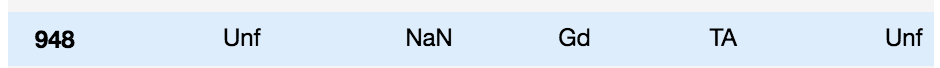

In [62]:
table_test.shape

(1459, 80)

In [63]:
table_train[table_train.BsmtFinType1=="Unf"][
    ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
].count()

BsmtFinType2    430
BsmtExposure    429
BsmtQual        430
BsmtCond        430
BsmtFinType1    430
dtype: int64

In [64]:
table_train[table_train.BsmtFinType2=="Unf"][
    ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
].count()

BsmtFinType2    1256
BsmtExposure    1255
BsmtQual        1256
BsmtCond        1256
BsmtFinType1    1256
dtype: int64

In [65]:
table_test[table_test.BsmtFinType1=="Unf"][
    ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
].count()

BsmtFinType2    421
BsmtExposure    419
BsmtQual        419
BsmtCond        421
BsmtFinType1    421
dtype: int64

In [66]:
table_test[table_test.BsmtFinType2=="Unf"][
    ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
].count()

BsmtFinType2    1237
BsmtExposure    1235
BsmtQual        1235
BsmtCond        1235
BsmtFinType1    1237
dtype: int64

I found that it is very usual to have a unfinied basement in both train and test dataset.  Let's take a further look if this is a entry error. 

In [67]:
table_train.loc[948][
    ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1","BsmtUnfSF","BsmtFinSF2","TotalBsmtSF"]
]

BsmtFinType2    Unf
BsmtExposure    NaN
BsmtQual         Gd
BsmtCond         TA
BsmtFinType1    Unf
BsmtUnfSF       936
BsmtFinSF2        0
TotalBsmtSF     936
Name: 948, dtype: object

In [68]:
table_train[
    (table_train.BsmtFinType2=="Unf")&(table_train.BsmtExposure.isnull())
][
    ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1","BsmtUnfSF","BsmtFinSF2","TotalBsmtSF"]]

,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,BsmtUnfSF,BsmtFinSF2,TotalBsmtSF
948,Unf,NaN,Gd,TA,Unf,936,0,936


After diagnosing the row 948, I think this is a entry error... Since I do not know what type of `BsmtExposure` is. I will remove this row to move forward.

In [69]:
table_train[948:949]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Normal,192500


In [70]:
table_train=table_train.drop(table_train.index[948],axis=0).reset_index(drop=True)

In [71]:
table_train.shape

(1459, 81)

Now, let's fill the `nan`s  with "NA" indicating No Basement.

In [72]:
ls_base = ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
for i in range(0,5):
    table_train[ls_base[i]]=table_train[ls_base[i]].fillna("NA")
    print(ls_base[i],":",table_train[ls_base[i]].isnull().sum())

BsmtFinType2 : 0
BsmtExposure : 0
BsmtQual : 0
BsmtCond : 0
BsmtFinType1 : 0


##### i. `MasVnrArea` and `MasVnrType`
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

In [73]:
table_train[table_train["MasVnrType"].isnull()][["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
972,NaN,NaN
976,NaN,NaN
1242,NaN,NaN
1277,NaN,NaN


In [74]:
table_train["MasVnrType"] = table_train["MasVnrType"].fillna("NA")

In [75]:
table_train["MasVnrArea"] = table_train["MasVnrArea"].fillna(0)

##### j. `Electrical` 

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [76]:
table_train[table_train["Electrical"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1378,1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2008,WD,Normal,167500


In [77]:
table_test[table_test["Electrical"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


The Row 1378 seems like a entry error. I will drop this row.

In [78]:
table_train.iloc[1378]


Id                  1380
MSSubClass            80
MSZoning              RL
LotFrontage           73
LotArea             9735
Street              Pave
Alley                 NA
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood      Timber
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle          SLvl
OverallQual            5
OverallCond            5
YearBuilt           2006
YearRemodAdd        2007
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
Foundation         PConc
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           7
Functional           Typ
Fireplaces             0
FireplaceQu           NA
GarageType       BuiltIn
GarageYrBlt         2007


In [79]:
table_train=table_train.drop(table_train.index[1378],axis=0).reset_index(drop=True)

Already, let's take a look of the null Stats of the train table now!

In [80]:
train_null_stats= wrangle.get_null_stats(table_train)
train_null_stats[train_null_stats.cnt != 0]

,cnt,ratio


#### 1.2.3.2 Test dataset Nulls

In [81]:
test_null_stats[test_null_stats.cnt != 0]

,cnt,ratio
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


##### a. `PoolQC`, `MiscFeature` , `Alley` , `Fence`, `FireplaceQu`, 



In [82]:
ls = ["PoolQC", "MiscFeature" , "Alley" , "Fence", "FireplaceQu"]

In [83]:
for i in range(0,5):
    table_test[ls[i]]=table_test[ls[i]].fillna("NA")
    print(ls[i],":",table_test[ls[i]].isnull().sum())

PoolQC : 0
MiscFeature : 0
Alley : 0
Fence : 0
FireplaceQu : 0


##### b. `LotFrontage`

In [84]:
table_test["LotFrontage"].unique()

array([ 80.,  81.,  74.,  78.,  43.,  75.,  nan,  63.,  85.,  70.,  26.,
        21.,  24., 102.,  94.,  90.,  79., 110., 105.,  41., 100.,  67.,
        60.,  73.,  92.,  84.,  39.,  88.,  25.,  30.,  57.,  68.,  98.,
       120.,  87., 119.,  65.,  56.,  69.,  50.,  53.,  52.,  51.,  72.,
        86., 124.,  44.,  83.,  64.,  82.,  38.,  89.,  35.,  58.,  66.,
        93.,  31.,  76.,  28.,  61.,  95., 129.,  59.,  77.,  96.,  47.,
        34., 117.,  48.,  62.,  42., 106., 112.,  32., 115.,  71.,  45.,
       109., 113., 125., 101., 104., 108., 130., 135.,  36.,  55., 136.,
        97.,  91.,  37.,  22., 103.,  99.,  40., 123.,  54., 107., 150.,
       160., 195., 128.,  33., 118., 134., 155., 126.,  46., 149., 200.,
       121., 131., 114.,  49., 133., 140.])

In [85]:
table_test['LotFrontage']=table_test.LotFrontage.fillna(0)

In [86]:
table_test['LotFrontage'].isnull().sum()

0

##### c. Garage Related features: `GarageYrBlt` , `GarageCond`, `GarageType`, `GarageFinish`, `GarageQual`

In [87]:
table_test[
    table_test.GarageCond.isnull() & table_test.GarageType.notnull()
][
    ["Id","GarageYrBlt" , "GarageCond", "GarageType", "GarageFinish", "GarageQual"]]

,Id,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual
666,2127,NaN,NaN,Detchd,NaN,NaN
1116,2577,NaN,NaN,Detchd,NaN,NaN


In [88]:
table_test[table_test.GarageType == "Detchd"][
    ["GarageYrBlt" , "GarageCond", "GarageType", "GarageFinish", "GarageQual"]].head(10)

,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual
11,1971.0,TA,Detchd,Unf,TA
12,1997.0,TA,Detchd,Unf,TA
31,1920.0,TA,Detchd,Unf,TA
37,2004.0,TA,Detchd,RFn,TA
38,2004.0,TA,Detchd,RFn,TA
39,2005.0,TA,Detchd,RFn,TA
40,2000.0,TA,Detchd,Unf,TA
54,1994.0,TA,Detchd,Unf,TA
63,1952.0,TA,Detchd,Unf,TA
66,1989.0,TA,Detchd,Unf,TA


There are 78 nulls in the `GarageCond` but 76 nulls in the `GarageType`. These two entry is contradictory to each other. 

I will change the `GarageType` of `Id` 2127 and 2577 to "NA"(No Garage) for now. It will be better if we can communicate with data provider in the real working situation. 

In [89]:
table_test.at[666, 'GarageType'] = "NA"

In [90]:
table_test.at[1116, 'GarageType'] = "NA"

In [91]:
table_test[table_test.GarageCond.isnull() & table_test.GarageType.notnull()
          ][
    ["Id","GarageYrBlt" , "GarageCond", "GarageType", "GarageFinish", "GarageQual"]]

,Id,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual
666,2127,NaN,NaN,NA,NaN,NaN
1116,2577,NaN,NaN,NA,NaN,NaN


Let's also change others `nan`s to "NA"

In [92]:
ls = ["GarageYrBlt" , "GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for i in range(0,5):
    table_test[ls[i]]=table_test[ls[i]].fillna("NA")
    print(ls[i],":",table_test[ls[i]].isnull().sum())

GarageYrBlt : 0
GarageCond : 0
GarageType : 0
GarageFinish : 0
GarageQual : 0


##### d. Basement Related features:  

`BsmtFinType2`, `BsmtExposure`, `BsmtQual`, `BsmtCond`, `BsmtFinType1`,

`BsmtHalfBath`,`BsmtFullBath`,`BsmtFinSF1`, `BsmtFinSF2`,`BsmtUnfSF`

In [93]:
test_null_stats.loc[test_null_stats.index.str.startswith("Bsmt")]

,cnt,ratio
BsmtCond,45,0.030843
BsmtQual,44,0.030158
BsmtExposure,44,0.030158
BsmtFinType1,42,0.028787
BsmtFinType2,42,0.028787
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
BsmtFinSF1,1,0.000685
BsmtFinSF2,1,0.000685
BsmtUnfSF,1,0.000685


Let's first look into `BsmtFinType2`, `BsmtExposure`, `BsmtQual`, `BsmtCond`, `BsmtFinType1`. They all have around 40 nulls. I want to see the rows has null but not all nulls.

In [94]:
# all nulls
allnulls = [(table_test.BsmtCond.isnull()&table_test.BsmtQual.isnull()&table_test.BsmtExposure.isnull()
             &table_test.BsmtFinType1.isnull()&table_test.BsmtFinType2.isnull())]
allnulls = np.asarray(allnulls,dtype=bool)
#No nulls
nonulls = [(table_test.BsmtCond.notnull()&table_test.BsmtQual.notnull()&table_test.BsmtExposure.notnull()
            &table_test.BsmtFinType1.notnull()&table_test.BsmtFinType2.notnull())]
nonulls = np.asarray(nonulls,dtype=bool)

In [95]:
ls=(~(allnulls|nonulls)).tolist()

In [96]:
flat_list = [item for sublist in ls for item in sublist]
flat_list.count(True)

7

In [97]:
table_test[flat_list][
    ["Id","BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1","BsmtUnfSF","BsmtFinSF2","TotalBsmtSF"]]

,Id,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,BsmtUnfSF,BsmtFinSF2,TotalBsmtSF
27,1488,Unf,NaN,Gd,TA,Unf,1595.0,0.0,1595.0
580,2041,Rec,Mn,Gd,NaN,GLQ,0.0,382.0,1426.0
725,2186,Unf,No,TA,NaN,BLQ,94.0,0.0,1127.0
757,2218,Unf,No,NaN,Fa,Unf,173.0,0.0,173.0
758,2219,Unf,No,NaN,TA,Unf,356.0,0.0,356.0
888,2349,Unf,NaN,Gd,TA,Unf,725.0,0.0,725.0
1064,2525,Unf,Av,TA,NaN,ALQ,240.0,0.0,995.0


**`Id`1488:** `BsmtExposure` is `nan`. "NA" indicats there is no basement in the house. However, this contradicts with other features( especially  `TotalBsmtSF`). This is probably a entry error. 

**`Id`2041:** `BsmtCond` is `nan`. "NA" indicats there is no basement in the house. However, this contradicts with other features( especially  `TotalBsmtSF`). This is probably a entry error. 

**`Id`2186:** `BsmtCond` is `nan`. "NA" indicats there is no basement in the house. However, this contradicts with other features( especially  `TotalBsmtSF`). This is probably a entry error. 

**`Id`2218:** `BsmtQual` is `nan`. "NA" indicats there is no basement in the house. However, this contradicts with other features( especially  `TotalBsmtSF`). This is probably a entry error. 

**`Id`2219:** `BsmtQual` is `nan`. "NA" indicats there is no basement in the house. However, this contradicts with other features( especially  `TotalBsmtSF`). This is probably a entry error. 

**`Id`2349:** `BsmtExposure` is `nan`. "NA" indicats there is no basement in the house. However, this contradicts with other features( especially  `TotalBsmtSF`). This is probably a entry error. 

**`Id`2525:** `BsmtCond` is `nan`. "NA" indicats there is no basement in the house. However, this contradicts with other features( especially  `TotalBsmtSF`). This is probably a entry error. 



It seems like these are all entry errors... 

I will put "NA" for these three entries for now. It is not recommended to do so in real life analysis.

In [98]:
#BsmtExposure
table_test.at[27,"BsmtExposure"] = "NA"
table_test.at[888,"BsmtExposure"] = "NA"

#BsmtQual
table_test.at[757,"BsmtQual"] = "NA"
table_test.at[758,"BsmtQual"] = "NA"

#BsmtCond
table_test.at[580,"BsmtCond"] = "NA"
table_test.at[725,"BsmtCond"] = "NA"
table_test.at[1064,"BsmtCond"] = "NA"


In [99]:
ls = ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
for i in range(0,5):
    table_test[ls[i]]=table_test[ls[i]].fillna("NA")
    print(ls[i],":",table_test[ls[i]].isnull().sum())

BsmtFinType2 : 0
BsmtExposure : 0
BsmtQual : 0
BsmtCond : 0
BsmtFinType1 : 0


Let's run a null_stats to double check. 

In [100]:
test_null_stats1 = wrangle.get_null_stats(table_test)
test_null_stats1[test_null_stats1.cnt != 0]

,cnt,ratio
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
BsmtFullBath,2,0.001371
Exterior2nd,1,0.000685
Exterior1st,1,0.000685
TotalBsmtSF,1,0.000685


`BsmtHalfBath`, `BsmtFullBath`,`TotalBsmtSF`,`BsmtUnfSF`,`BsmtFinSF2`,`BsmtFinSF1`

I will first to check which ones of the rows have null values.

In [101]:
table_test[(table_test.BsmtHalfBath.isnull()| table_test.BsmtFullBath.isnull()|table_test.TotalBsmtSF.isnull()|\
           table_test.BsmtUnfSF.isnull()|table_test.BsmtFinSF2.isnull()|table_test.BsmtFinSF1.isnull())]\
[["Id","BsmtHalfBath", "BsmtFullBath","TotalBsmtSF","BsmtUnfSF","BsmtFinSF2","BsmtFinSF1","BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]]

,Id,BsmtHalfBath,BsmtFullBath,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NA,NA,NA,NA,NA
728,2189,NaN,NaN,0.0,0.0,0.0,0.0,NA,NA,NA,NA,NA


The data description of the variables are as following: 

`BsmtHalfBath`: Basement half bathrooms

`BsmtFullBath`: Basement full bathrooms

`BsmtUnfSF`: Unfinished square feet of basement area

`TotalBsmtSF`: Total square feet of basement area

`BsmtFinSF1`: Type 1 finished square feet

`BsmtFinSF2`: Type 2 finished square feet

`BsmtUnfSF`: Unfinished square feet of basement area

Since they are all numerical features. I will fill them with 0.

In [102]:
ls = ["BsmtHalfBath", "BsmtFullBath","TotalBsmtSF","BsmtUnfSF","BsmtFinSF2","BsmtFinSF1","BsmtFinType2"]
for i in range(0,6):
    table_test[ls[i]]=table_test[ls[i]].fillna(0)
    print(ls[i],":",table_test[ls[i]].isnull().sum())

BsmtHalfBath : 0
BsmtFullBath : 0
TotalBsmtSF : 0
BsmtUnfSF : 0
BsmtFinSF2 : 0
BsmtFinSF1 : 0


In [103]:
test_null_stats2 = wrangle.get_null_stats(table_test)
test_null_stats2[test_null_stats2.cnt != 0]

,cnt,ratio
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Utilities,2,0.001371
Functional,2,0.001371
GarageCars,1,0.000685
GarageArea,1,0.000685
KitchenQual,1,0.000685
Exterior2nd,1,0.000685
Exterior1st,1,0.000685


##### e. `MasVnrType` & `MasVnrArea`

In [104]:
table_test[table_test.MasVnrType.isnull()][["Id","MasVnrType", "MasVnrArea"]]

,Id,MasVnrType,MasVnrArea
231,1692,NaN,NaN
246,1707,NaN,NaN
422,1883,NaN,NaN
532,1993,NaN,NaN
544,2005,NaN,NaN
581,2042,NaN,NaN
851,2312,NaN,NaN
865,2326,NaN,NaN
880,2341,NaN,NaN
889,2350,NaN,NaN


`Id` 2611 seems like a entry error. I will change the `MasVnrArea` to 0 in this case. 

In [105]:
table_test.at[1150, 'MasVnrArea'] = 0

In [106]:
table_test['MasVnrArea'] = table_test.MasVnrArea.fillna(0)

In [107]:
table_test['MasVnrType'] = table_test.MasVnrType.fillna("NA")

##### f. `MSZoning`

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	

I will put "NA" even though there is no "NA" in the data description. 

In [108]:
table_test[table_test.MSZoning.isnull()][['MSZoning','Id','MSSubClass']]

,MSZoning,Id,MSSubClass
455,NaN,1916,30
756,NaN,2217,20
790,NaN,2251,70
1444,NaN,2905,20


In [109]:
table_test.MSZoning=table_test.MSZoning.fillna("NA")

##### g. Utilities,	Functional, GarageCars, GarageArea, KitchenQual, Exterior2nd, Exterior1st, SaleType	
Utilities: Type of utilities available
       
Functional: Home functionality (Assume typical unless deductions are warranted)

KitchenQual: Kitchen quality

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)
       
SaleType: Type of sale



In [110]:
table_test[(table_test.Utilities.isnull()| table_test.Functional.isnull()|table_test.GarageCars.isnull()|\
           table_test.GarageArea.isnull()|table_test.KitchenQual.isnull()|table_test.Exterior2nd.isnull()|\
            table_test.Exterior1st.isnull()|table_test.SaleType.isnull())]\
[["Utilities","Functional","GarageYrBlt", "GarageCars", "GarageArea", "KitchenQual", "Exterior2nd", "Exterior1st", "SaleType"]]

,Utilities,Functional,GarageYrBlt,GarageCars,GarageArea,KitchenQual,Exterior2nd,Exterior1st,SaleType
95,AllPub,Mod,1917,1.0,180.0,NaN,Wd Sdng,Wd Sdng,COD
455,NaN,Min1,1975,1.0,280.0,TA,Wd Sdng,Wd Sdng,ConLD
485,NaN,Min2,1952,2.0,495.0,TA,BrkFace,BrkFace,WD
691,AllPub,Typ,NA,0.0,0.0,Fa,NaN,NaN,WD
756,AllPub,NaN,1952,2.0,487.0,Fa,VinylSd,AsbShng,WD
1013,AllPub,NaN,1910,1.0,264.0,TA,Wd Sdng,Wd Sdng,COD
1029,AllPub,Typ,1958,1.0,303.0,TA,Plywood,Plywood,NaN
1116,AllPub,Typ,NA,NaN,NaN,Gd,Plywood,Wd Sdng,WD


In [111]:
table_test.GarageCars=table_test.GarageCars.fillna(0)
table_test.GarageArea=table_test.GarageArea.fillna(0)


In [112]:
table_test.Utilities=table_test.Utilities.fillna("NA")
table_test.Functional=table_test.Functional.fillna("NA")
table_test.KitchenQual=table_test.KitchenQual.fillna("NA")
table_test.Exterior2nd=table_test.Exterior2nd.fillna("NA")
table_test.Exterior1st=table_test.Exterior1st.fillna("NA")
table_test.SaleType=table_test.SaleType.fillna("NA")

Great! We have cleant all  the test and train data. Let's check our work.

In [113]:
test_null_stats_check = wrangle.get_null_stats(table_test)
test_null_stats_check[test_null_stats_check.cnt != 0]

,cnt,ratio


In [114]:
train_null_stats_check = wrangle.get_null_stats(table_train)
train_null_stats_check[train_null_stats_check.cnt != 0]

,cnt,ratio


## 1.3 Categorial and numerical data

To better understand the dataset, I will Identify which features is categorical or numerical. 

First of all, I want to drop feature `Id` from this dataset. Since we have index alreay, it is not necessary to have it.

In [115]:
table_train = table_train.drop(["Id"],axis =1)

- **Categotical:**

`MSSubClass`,`MSZoning`,`Street`,`Alley`,`LotShape`,`LandContour`,`Utilities`,`LotConfig`,`LandSlope`,

`Neighborhood`,`Condition1`,`Condition2`,`BldgType`,`HouseStyle`,`YearBuilt`,`YearRemodAdd`,`RoofStyle`,

`RoofMatl`,`Exterior1st`,`Exterior2nd`,`MasVnrType`,`ExterQual`,`ExterCond`,`Foundation`,`BsmtQual`,

`BsmtCond`,`BsmtExposure`,`BsmtFinType1`,`BsmtFinType2`,`Heating`,`HeatingQC`,`CentralAir`,`Electrical`,

`KitchenQual`,`Functional`,`FireplaceQu`,`GarageType`,`GarageYrBlt`,`GarageFinish`,`GarageQual`,`GarageCond`,

`PavedDrive`,`PoolQC`,`Fence`,`MiscFeature`,`MoSold`,`YrSold`,`SaleType`,`SaleCondition`




- **Numerical:**

`LotFrontage`, `LotArea`, `OverallQual`,`OverallCond`,`MasVnrArea`,`BsmtFinSF1`,`BsmtFinSF2`,`BsmtUnfSF`,

`TotalBsmtSF`,`1stFlrSF`,`2ndFlrSF`,`LowQualFinSF`,`GrLivArea`,`BsmtFullBath`,`BsmtHalfBath`,`FullBath`,

`HalfBath`,`Bedroom`,`Kitchen`,`TotRmsAbvGrd`,`Fireplaces`,`GarageCars`,`GarageArea`,`WoodDeckSF`,

`OpenPorchSF`,`EnclosedPorch`,`3SsnPorch`,`ScreenPorch`,`PoolArea`,`MiscVal`




- **Responese Variable:**
`SalePrice`

# Step 2. Exploratory Data Analysis

## 2.1 `SalePrice`
Let's take a look at Response variable `SalePrice`

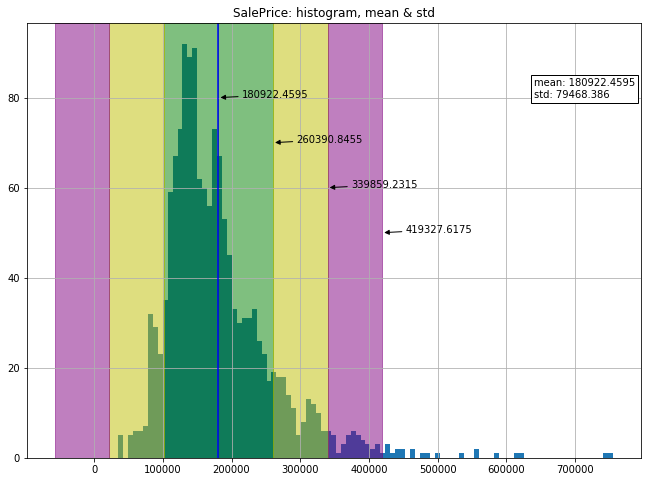

In [116]:
ax = exploratory.center_scale_plot(table_train.SalePrice, np.mean, np.std, bins=100)

The `SalePrice` distribution is right skewed with mean 180,922 and std 79,468. Most of data are within 2 std away from mean. Around 1.5% of housing price exceeds $419,327 (3 std away from the mean). We can see that there are some extremely expensive houses in the distribution.

In [117]:
len(table_train[table_train.SalePrice > 419327]) / len(table_train)

0.015089163237311385

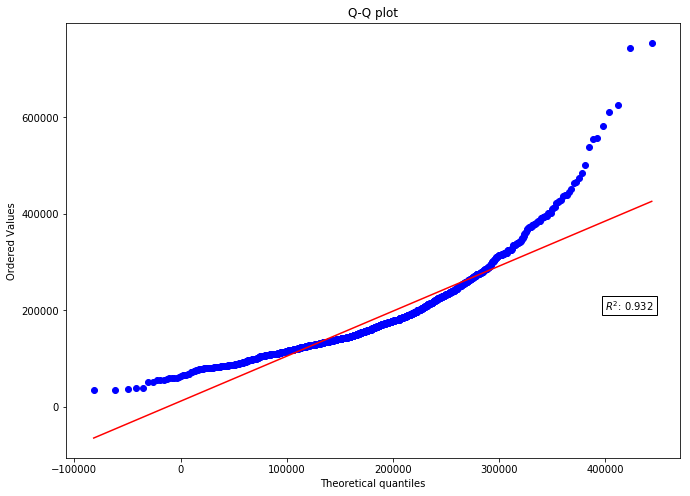

In [118]:
ax = exploratory.qq_plot(table_train.SalePrice)

The $R^2$ of the Q-Q plot is 93.2%. It is close to a Normal Distribution. However, we can tell that the extreme values at the tails, expecially right tail, are diverging from the Normal Distribution, indicating that there are some very expensive houses in the market.

Let's take a look of Log `SalePrice` below: 

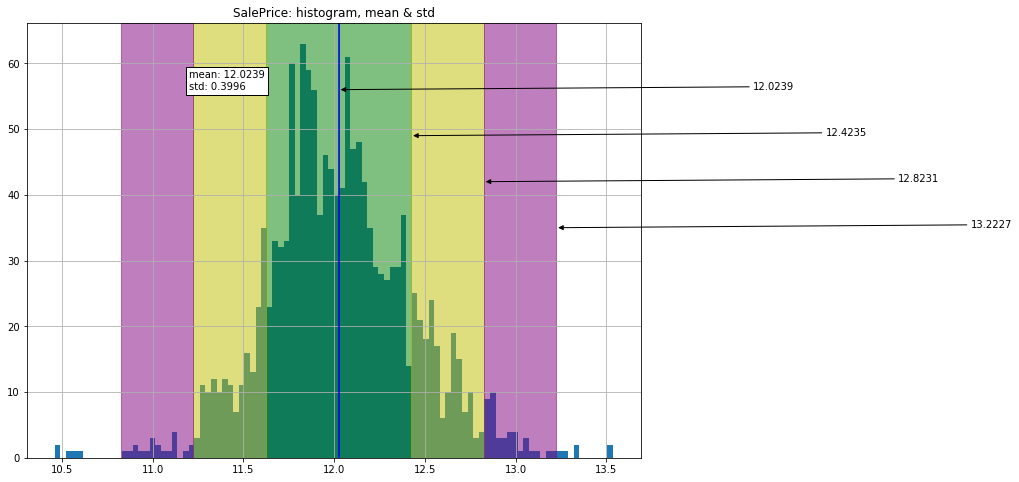

In [119]:
ax = exploratory.center_scale_plot(np.log(table_train.SalePrice), np.mean, np.std, bins=100)

The log `SalePrice` is very normal. We will use Log `SalePrice` for future linear regression analysis.

In [120]:
LogSalePrice = np.log(table_train.SalePrice)

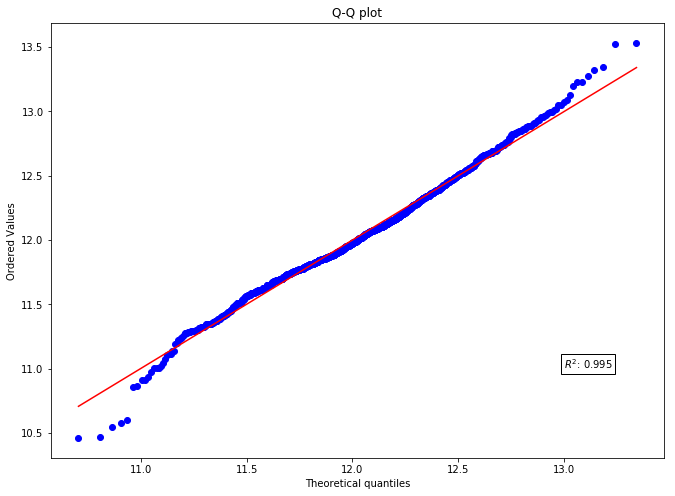

In [121]:
ax = exploratory.qq_plot(LogSalePrice)

We can tell that the `LogSalePrice` is more normal than `SalePrice`.

I am curious about how `LogSalePrice` is related to `GrLivArea`.

`GrLivArea`: Above grade (ground) living area square feet

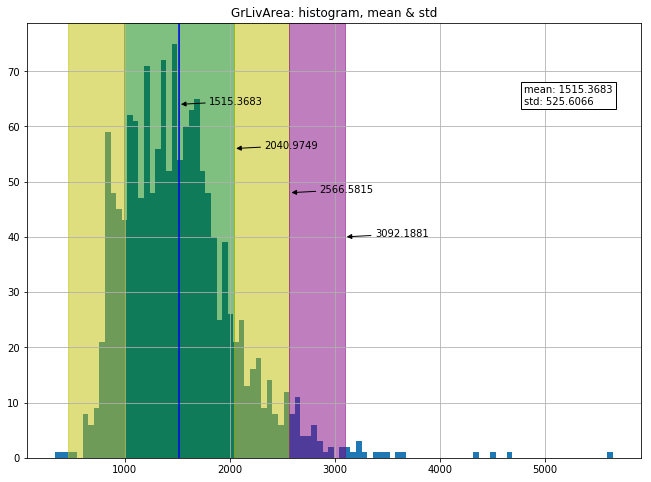

In [122]:
ax = exploratory.center_scale_plot(table_train.GrLivArea, np.mean, np.std, bins=100)

It looks like `GrLivArea` also have a right skewed distribution as `SalePrice`. Let's  take the log of `GrLivArea`.

In [123]:
LogGRlivArea = np.log(table_train.GrLivArea)

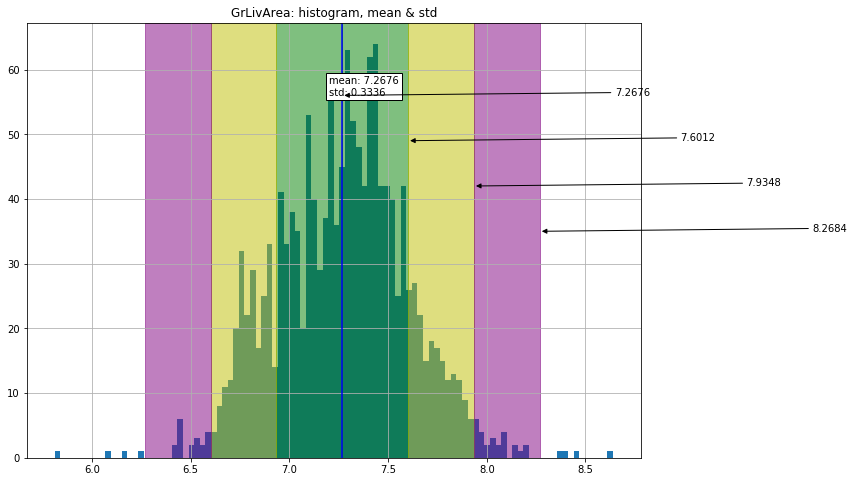

In [124]:
ax = exploratory.center_scale_plot(LogGRlivArea, np.mean, np.std, bins=100)

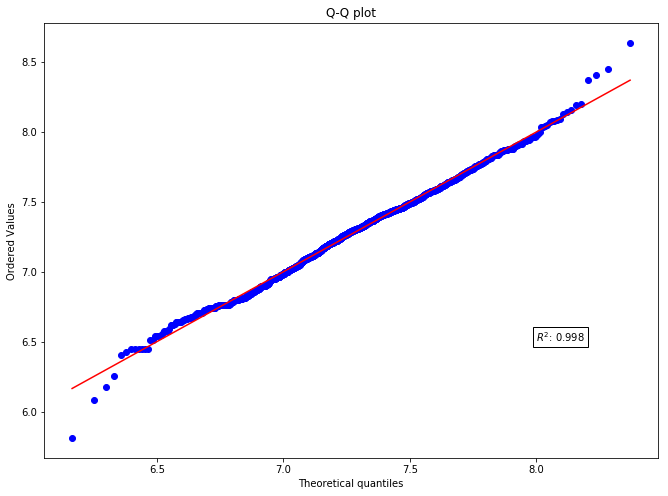

In [125]:
ax = exploratory.qq_plot(LogGRlivArea)

Let's run a linear regression between `SalePrice` and `GrLivArea`.

### Use Sklearn to run linear regression

#### Run Linear Regression with `SalePrice` and `GRlivArea`

#### Evaluation:   R squared

R-Squared = Explained variance of the model / Total variance of the target variable

Coef:  [[107.14080402]]
intercept:  [18564.68011456]


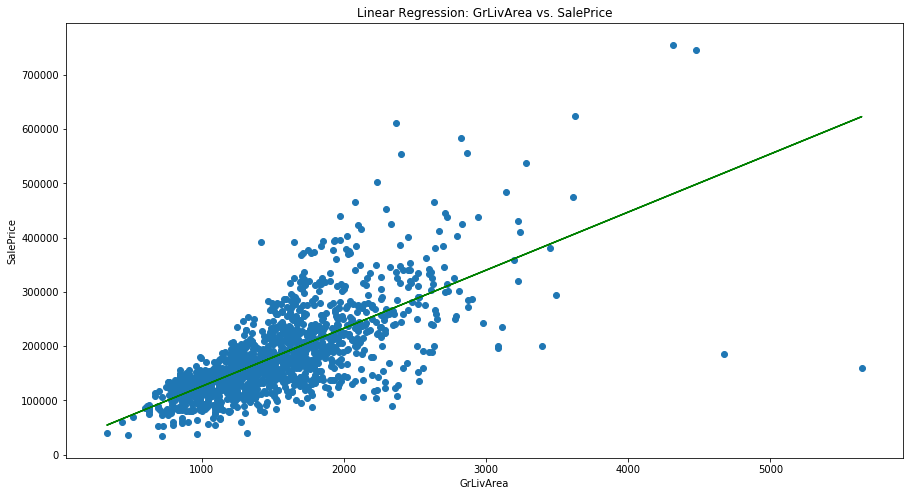

In [126]:
X = table_train[['GrLivArea']]
y = table_train[['SalePrice']]
reg = LinearRegression()
reg.fit(X,y)
pred_reg = reg.predict(X)

print("Coef: ", reg.coef_)
print("intercept: ", reg.intercept_)

plt.figure(figsize=(15, 8))
plt.plot(X, reg.predict(X), color = 'green',)
plt.scatter(X,y)
ax = plt.gca()
xlab = ax.set_xlabel("GrLivArea") #Above grade (ground) living area square feet
ylab = ax.set_ylabel("SalePrice")
t = ax.title.set_text("Linear Regression: GrLivArea vs. SalePrice")

In [127]:
r2_score(y, pred_reg)

0.502160676271405

Without taking the  log of `SalePrice` and `GrLivArea`, I achieved 50% of R squared. 


#### Run Linear Regression with `LogSalePrice` and `LogGRlivArea`

In [128]:
reg_log_grliv = LinearRegression()
reg_log_grliv.fit(LogGRlivArea.to_frame(), LogSalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
y_pred_grliv_log = reg_log_grliv.predict(LogGRlivArea.to_frame())

Coef:  [0.87459808]
intercept:  5.667679384802223


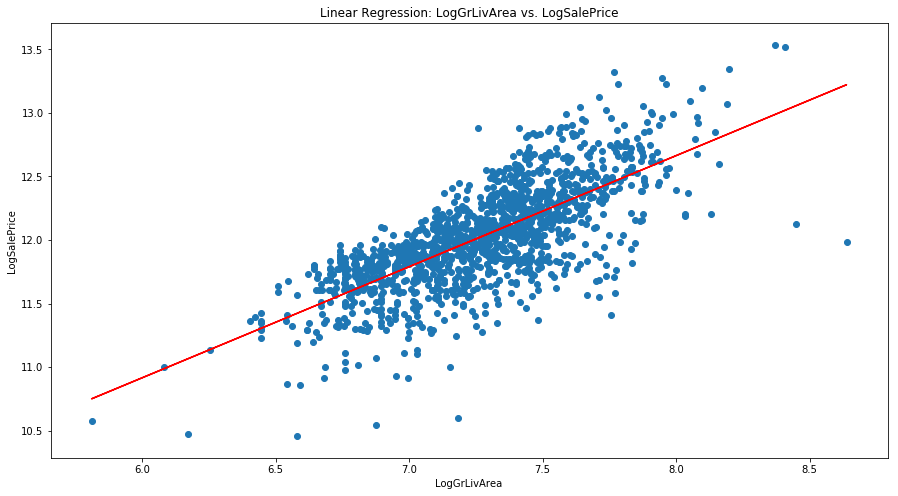

In [130]:
print("Coef: ", reg_log_grliv.coef_)
print("intercept: ", reg_log_grliv.intercept_)

plt.figure(figsize=(15, 8))
plt.plot(LogGRlivArea, y_pred_grliv_log, color = 'red',)
plt.scatter(LogGRlivArea,LogSalePrice)
ax = plt.gca()
xlab = ax.set_xlabel("LogGrLivArea") #Above grade (ground) living area square feet
ylab = ax.set_ylabel("LogSalePrice")
t = ax.title.set_text("Linear Regression: LogGrLivArea vs. LogSalePrice")

In [131]:
r2_score(LogSalePrice, y_pred_grliv_log)

0.5332424232550255

So the R square is 0.53324. This indicates that 53.3% of change in `LogSalePrice` can be explained by `LogGrLivArea`. Taking Log of both variables improved the R-Squared by 3%. 

Let's add a few more variables to the linear regression. 

- `LotArea`, `TotalBsmtSF`, `PoolArea`

In [132]:
X1 = table_train[['GrLivArea','LotArea', 'TotalBsmtSF', 'PoolArea']]
y = LogSalePrice
multi_reg = LinearRegression()
multi_reg.fit(X1,y)

print("Coef: ", reg.coef_)
print("intercept: ", reg.intercept_)

Coef:  [[107.14080402]]
intercept:  [18564.68011456]


In [133]:
mul_line = multi_reg.predict(X1)

In [134]:
r2 = r2_score(y, mul_line)

In [135]:
r2

0.6053530084866738

The R square improved 11% as we added 3 more variables to the regression. 

# Step 3. Modeling

Let's first apply one hot encoding to the categorical features.


## One Hot Encoding

In [136]:
cate_string = "`MSSubClass`,`MSZoning`,`Street`,`Alley`,`LotShape`,`LandContour`,`Utilities`,`LotConfig`,`LandSlope`,`Neighborhood`,`Condition1`,`Condition2`,`BldgType`,`HouseStyle`,`YearBuilt`,`YearRemodAdd`,`RoofStyle`,`RoofMatl`,`Exterior1st`,`Exterior2nd`,`MasVnrType`,`ExterQual`,`ExterCond`,`Foundation`,`BsmtQual`,`BsmtCond`,`BsmtExposure`,`BsmtFinType1`,`BsmtFinType2`,`Heating`,`HeatingQC`,`CentralAir`,`Electrical`,`KitchenQual`,`Functional`,`FireplaceQu`,`GarageType`,`GarageYrBlt`,`GarageFinish`,`GarageQual`,`GarageCond`,`PavedDrive`,`PoolQC`,`Fence`,`MiscFeature`,`MoSold`,`YrSold`,`SaleType`,`SaleCondition`"

In [137]:
cate_string.replace("`","'")

"'MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition'"

In [138]:
categorical = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']

In [139]:
num_string = "`LotFrontage`, `LotArea`, `OverallQual`,`OverallCond`,`MasVnrArea`,`BsmtFinSF1`,`BsmtFinSF2`,`BsmtUnfSF`,`TotalBsmtSF`,`1stFlrSF`,`2ndFlrSF`,`LowQualFinSF`,`GrLivArea`,`BsmtFullBath`,`BsmtHalfBath`,`FullBath`,`HalfBath`,`Bedroom`,`Kitchen`,`TotRmsAbvGrd`,`Fireplaces`,`GarageCars`,`GarageArea`,`WoodDeckSF`,`OpenPorchSF`,`EnclosedPorch`,`3SsnPorch`,`ScreenPorch`,`PoolArea`,`MiscVal`"

In [140]:
num_string.replace("`","'")

"'LotFrontage', 'LotArea', 'OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'"

In [141]:
numerical = ['LotFrontage', 'LotArea', 'OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [142]:
response = ['SalePrice']

In [143]:
def get_model_data(table,categorical,numerical,response):
    cols = response+categorical+numerical
    for_modeling = table[cols]
    
    to_dummy = categorical

    return pd.get_dummies(for_modeling, columns=to_dummy)

In [144]:
for_modeling_df=get_model_data(table_train,categorical,numerical,response)


In [145]:
for_modeling_df.shape

(1458, 601)

In [146]:
for_modeling_df.columns = [c.replace(".", "_") for c in for_modeling_df.columns]

In [147]:
for_modeling_df.columns

Index(['SalePrice', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=601)

The new dataframe for modeling have 600 features after applying one hot encoding.  

In [148]:
y = ['SalePrice']

In [149]:
X = [col for col in for_modeling_df.columns if col != 'SalePrice']

In [150]:
for_modeling_df[X].head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [151]:
for_modeling_df.describe()

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,180922.459534,57.607682,10514.971193,6.099451,5.576132,103.159808,444.248285,46.613169,567.113169,1057.974623,...,0.003429,0.083676,0.002058,0.867627,0.069273,0.002743,0.008230,0.013717,0.820302,0.085734
std,79495.652554,34.685207,9987.673674,1.383445,1.113359,180.832020,456.114552,161.420729,442.038488,438.639799,...,0.058480,0.276997,0.045330,0.339012,0.254005,0.052324,0.090379,0.116355,0.384068,0.280067
min,34900.000000,0.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129925.000000,42.000000,7544.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,796.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,163000.000000,63.000000,9475.000000,6.000000,5.000000,0.000000,384.000000,0.000000,477.500000,992.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,214000.000000,79.000000,11600.000000,7.000000,6.000000,164.750000,712.750000,0.000000,808.000000,1298.750000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,755000.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preparing data for cross validation

In [152]:
cv, final = train_test_split(for_modeling_df.index, test_size=.20, random_state=0)


In [153]:
final = for_modeling_df.loc[final,:]
final.shape

(292, 601)

In [154]:
for_modeling_df = for_modeling_df.loc[cv, :]
for_modeling_df.shape

(1166, 601)

## 3.1 Multi Linear Regression

In [155]:
results = crossvalidate.cv_score(model_obj=LinearRegression(),
                                 X=for_modeling_df[X],
                                 y=for_modeling_df[y],
                                 score_funcs=[metrics.mean_absolute_error,
                                              metrics.mean_squared_error,
                                             r2_score],
                                 random_state=0,
                                 splits = 10)

In [156]:
results

mean           std
mean_absolute_error train  9.520590e+03  2.927504e+02
                    test   4.596019e+07  1.146946e+08
mean_squared_error  train  2.015838e+08  1.283151e+07
                    test   1.098715e+18  3.284455e+18
r2_score            train  9.676354e-01  1.310162e-03
                    test  -1.116311e+08  3.192946e+08

The `r2_score` is extremely small (-1.116311e+08). This model is very overfitted. 

## 3.2 Regression Tree

In [157]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, for_modeling_df[X], np.log(for_modeling_df[y]), cv=10)

array([0.75753189, 0.67992034, 0.70235832, 0.70780194, 0.65569323,
       0.71504714, 0.73417243, 0.68768907, 0.69332831, 0.71103051])

In [158]:
results = crossvalidate.cv_score(model_obj=DecisionTreeRegressor(),
                                 X=for_modeling_df[X],
                                 y=for_modeling_df.SalePrice,
                                 score_funcs=[metrics.mean_absolute_error,
                                              metrics.mean_squared_error,
                                             r2_score],
                                 random_state=0)

In [159]:
results

mean           std
mean_absolute_error train  0.000000e+00  0.000000e+00
                    test   2.622397e+04  2.039015e+03
mean_squared_error  train  0.000000e+00  0.000000e+00
                    test   1.622379e+09  2.003602e+08
r2_score            train  1.000000e+00  0.000000e+00
                    test   7.347595e-01  4.734452e-02

Without tuning, we achieved 74% of r2_score on the test set. However, the model fits prefectly on the training set. This is a sign of overfitting.

#### Validation 
`max_depth`:

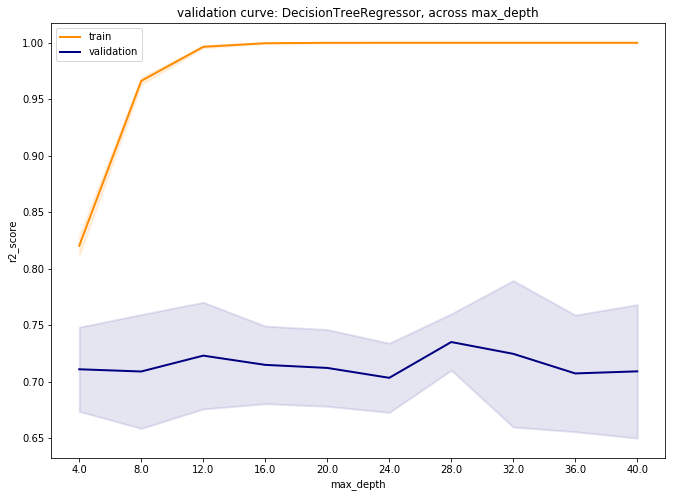

In [160]:
curves.validation_curve(model_type=DecisionTreeRegressor,
                        X=for_modeling_df[X],
                        y=for_modeling_df[y],
                        param_name='max_depth',
                        param_range=np.linspace(4, 40, 10),
                        score=r2_score)

The model's `r2_score` fluctuate around 70%. It seems like tuning `max_depth` does not help much.

`min_samples_split`:

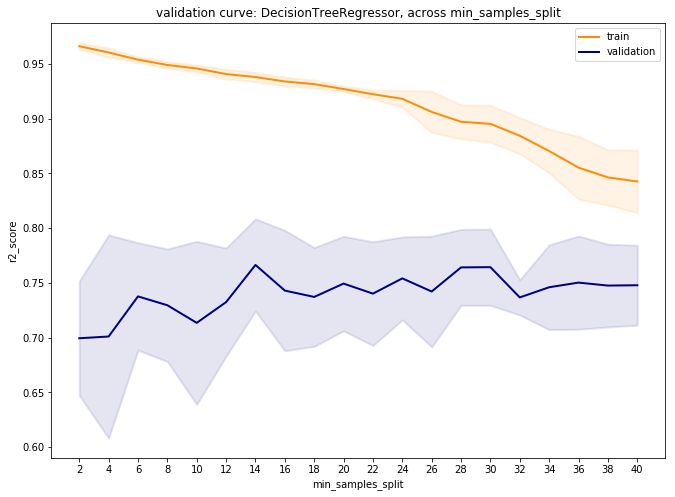

In [161]:
curves.validation_curve(model_type=DecisionTreeRegressor,
                        X=for_modeling_df[X],
                        y=for_modeling_df[y],
                        param_name='min_samples_split',
                        param_range=[2*i for i in range(1,21)],
                        other_params={"max_depth": 8},
                        score=r2_score)

Similar to tuning `max_depth`, the `r2_score` fluctuates around 75%. This is not very impressivce. 

## 3.3 Random Forest Regression 

In [162]:
results = crossvalidate.cv_score(model_obj=RandomForestRegressor(n_estimators = 100),
                                 X=for_modeling_df[X],
                                 y=for_modeling_df.SalePrice,
                                 score_funcs=[metrics.mean_absolute_error,
                                              metrics.mean_squared_error,
                                             r2_score],
                                 random_state=0)

In [163]:
results

mean           std
mean_absolute_error train  6.679918e+03  1.015463e+02
                    test   1.826949e+04  1.379884e+03
mean_squared_error  train  1.358936e+08  7.420309e+06
                    test   9.934132e+08  1.804510e+08
r2_score            train  9.781557e-01  1.248824e-03
                    test   8.367493e-01  4.367298e-02

The training `r2_score` is 97.7% and  the testing `r2_score` is 83.9%. The model seems overfitting.

#### Tuning

`max_depth`:

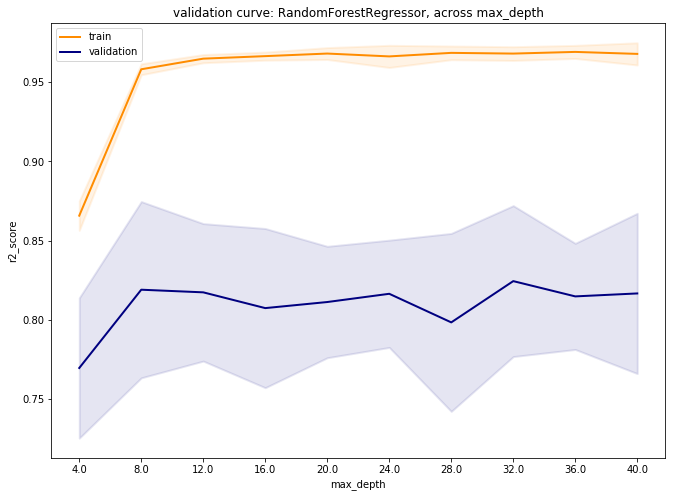

In [164]:
curves.validation_curve(model_type=RandomForestRegressor,
                        X=for_modeling_df[X],
                        y=for_modeling_df[y].SalePrice,
                        param_name='max_depth',
                        param_range=np.linspace(4, 40, 10),
                        other_params={"n_estimators": 10},
                        score=r2_score)

The model stays at 83% of `r2_score` while `max_depth` > 8. 

`min_samples_split`:

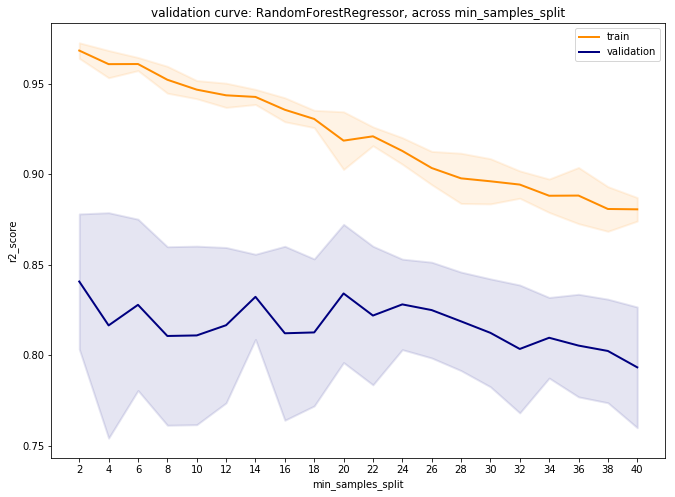

In [165]:
curves.validation_curve(model_type=RandomForestRegressor,
                        X=for_modeling_df[X],
                        y=for_modeling_df[y].SalePrice,
                        param_name='min_samples_split',
                        param_range=[2*i for i in range(1,21)],
                        other_params={"n_estimators": 10},
                        score=r2_score)

In [166]:
results = crossvalidate.cv_score(model_obj=RandomForestRegressor(n_estimators = 100, min_samples_split=14,max_depth=8),
                                 X=for_modeling_df[X],
                                 y=for_modeling_df.SalePrice,
                                 score_funcs=[metrics.mean_absolute_error,
                                              metrics.mean_squared_error,
                                             r2_score],
                                 random_state=0)

In [167]:
results

mean           std
mean_absolute_error train  1.190617e+04  2.268192e+02
                    test   1.909880e+04  1.562438e+03
mean_squared_error  train  3.519668e+08  2.252470e+07
                    test   1.044360e+09  1.782014e+08
r2_score            train  9.434191e-01  3.791936e-03
                    test   8.289274e-01  4.070576e-02

We can tell that even with tuning parameters, the model can not improve much. 

Since we are actually using a dataset with many features (600), let's try some dimension reduction techniques. 

# 4. Feature Selection

Through selecting a good subset out of the total feature space, we can:
- avoid overfitting
- reduce computational burdens
- reduce model complexity
- improve model performance

### Techniques

Here are a few approaches, at a high level:

- decomposition, i.e. feature compression (actually this a preprocessing and not a selection technique)
- a priori modeling to first get useful features, which are then fed into another model
- de-redundification of feature set

### Decomposition

You are essentially using some statistics, geometry, etc. ... some kind of math to compress the width of your table.

Approaches include:
- principal component analysis (PCA)
- k-means clustering

In [168]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [169]:
km = KMeans(n_clusters=2)

In [170]:
clusters = km.fit_transform(for_modeling_df[X])

In [171]:
clusters.shape

(1166, 2)

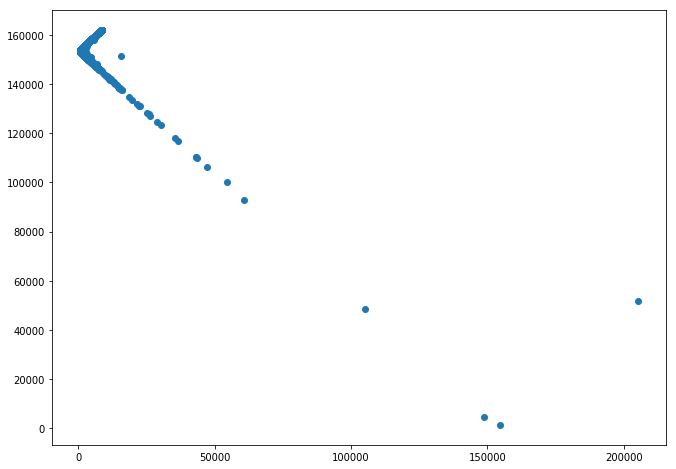

In [172]:
fig = plt.figure(figsize=(11, 8))
ax = plt.scatter(clusters[:, 0], clusters[:, 1])

In [173]:
pca = PCA(n_components=2)

In [174]:
pca = pca.fit_transform(for_modeling_df[X])

In [175]:
pca_df = pd.DataFrame(data=pca)

In [176]:
pca_df.head()

,0,1
0,-1526.800660,-104.166580
1,-9071.550680,-807.913121
2,-2252.109314,-365.714013
3,-1254.721911,13.781351
4,-7755.265589,215.439841


In [177]:
pca.shape

(1166, 2)

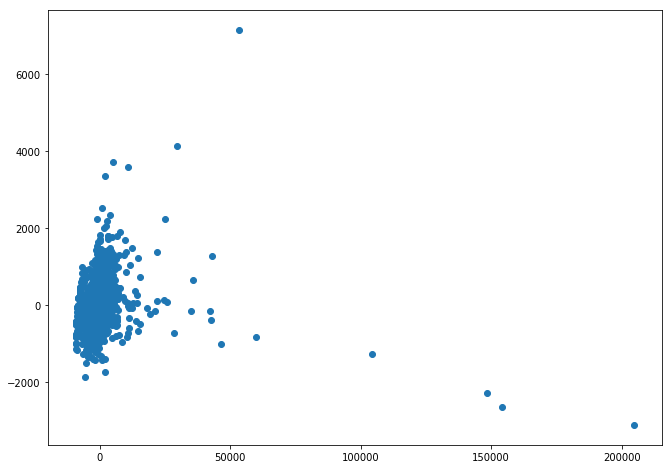

In [178]:
fig = plt.figure(figsize=(11, 8))
ax = plt.scatter(pca[:, 0], pca[:, 1])

Let's fit the pca_df to a linear regression. 

In [179]:
results = crossvalidate.cv_score(model_obj=LinearRegression(),
                                 X=pca_df,
                                 y=for_modeling_df[y].SalePrice,
                                 score_funcs=r2_score,
                                 random_state=0,
                                 splits = 10,
                                 scale_obj=StandardScaler())

In [180]:
results

mean       std
r2_score train  0.614180  0.024820
         test   0.603545  0.124277

The performance of the linear regression with PCA reduction is not impressive as well. Both training and testing `r2_score` are around 60%.

### Model Pipelining

This involves using some kind of model across the entirety of the validation set, where the model should be one that has some capabilities around picking features for you. You may very well just want to use this model as your prediction model. But in some cases you may want to use a different model for predictions, so you first use this model just to pick your features.

Models that can be good at selecting features are:
- random forests
- lasso regression

#### Random Forest

A explaination on `feature_importances_` is [here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e) .

In [181]:
rf_val = RandomForestRegressor(n_estimators=100)

In [182]:
rf_val = rf_val.fit(for_modeling_df[X], for_modeling_df[y].SalePrice)

In [183]:
list(filter(lambda x: "importance" in x, dir(rf_val.estimators_[0])))

['feature_importances_']

In [184]:
importances = pd.Series(rf_val.feature_importances_, index=X, name="importance").sort_values(ascending=False)

In [185]:
importances[:10].index

Index(['OverallQual', 'GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF1',
       'GarageArea', 'GarageCars', '1stFlrSF', 'LotArea', 'MasVnrArea'],
      dtype='object')

In [186]:
results = crossvalidate.cv_score(model_obj=LinearRegression(),
                                 X=for_modeling_df[importances[:10].index],
                                 y=for_modeling_df[y].SalePrice,
                                 score_funcs=r2_score,
                                 random_state=0,
                                 splits = 10,
                                 scale_obj=StandardScaler())

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 we

In [187]:
results

mean       std
r2_score train  0.771065  0.015089
         test   0.766104  0.106241

I analyzed the model's `r2_score` by adding one more feature to the LinearRegression.

In [188]:
train_r2_ls = []
test_r2_ls = []

for i in range(1,len(importances)):

    results = crossvalidate.cv_score(model_obj=LinearRegression(),
                                 X=for_modeling_df[importances[:i].index].astype(float),
                                 y=for_modeling_df[y],
                                 score_funcs=r2_score,
                                 random_state=0,
                                 scale_obj=StandardScaler())

    train_r2 = results.loc[("r2_score", "train"), "mean"]
    test_r2 =  results.loc[("r2_score", "test"), "mean"]
    train_r2_ls.append(train_r2)
    test_r2_ls.append(test_r2)
    

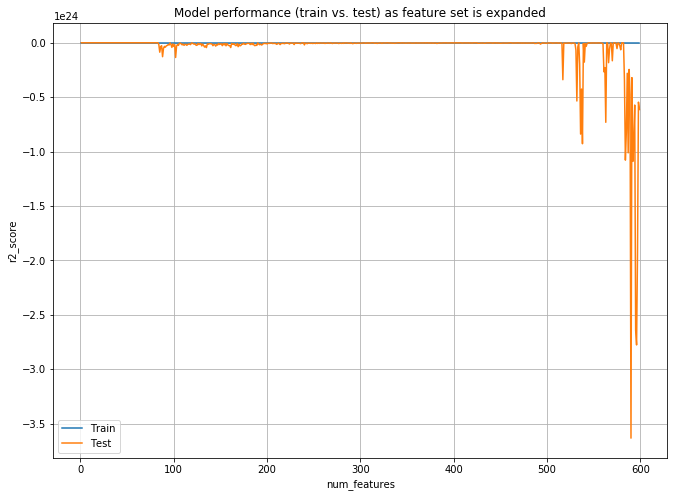

In [189]:
x = range(1,len(importances))
plt.figure(figsize=(11,8))
plt.plot(x,train_r2_ls,label="Train")
plt.plot(x,test_r2_ls,label="Test")
plt.grid()
plt.legend()

ax = plt.gca()
xlab = ax.set_xlabel("num_features")
ylab = ax.set_ylabel("r2_score")
t = ax.title.set_text("Model performance (train vs. test) as feature set is expanded")

We can tell that there are some extremely small `r2_score` around 70 numbers of features as well as features are after 430. This Indicated that there is a lot of over fitting at these points. It could be casued by **multicollinearity** where the predictors in the model are correlated. Adding redundant features to the linear regression would lead the model to be less robust. 

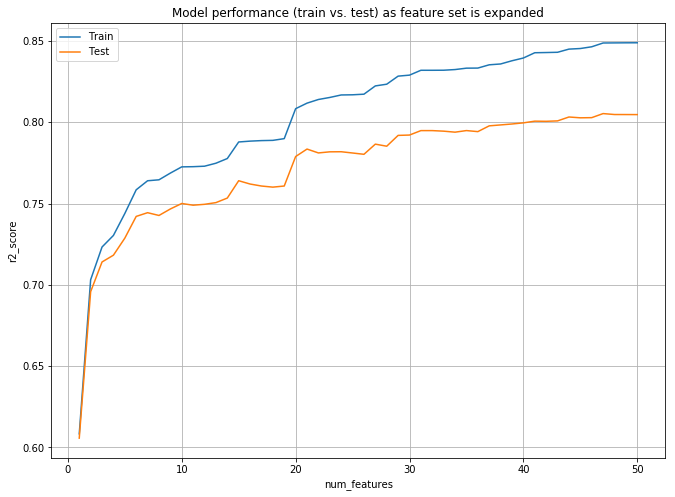

In [190]:
x = range(1,51)
plt.figure(figsize=(11,8))
plt.plot(x,train_r2_ls[:50],label="Train")
plt.plot(x,test_r2_ls[:50],label="Test")
plt.grid()
plt.legend()

ax = plt.gca()
xlab = ax.set_xlabel("num_features")
ylab = ax.set_ylabel("r2_score")
t = ax.title.set_text("Model performance (train vs. test) as feature set is expanded")

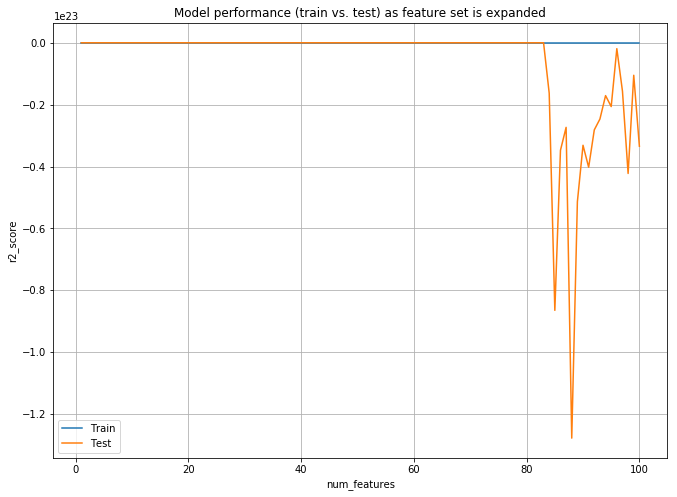

In [191]:
x = range(1,101)
plt.figure(figsize=(11,8))
plt.plot(x,train_r2_ls[:100],label="Train")
plt.plot(x,test_r2_ls[:100],label="Test")
plt.grid()
plt.legend()

ax = plt.gca()
xlab = ax.set_xlabel("num_features")
ylab = ax.set_ylabel("r2_score")
t = ax.title.set_text("Model performance (train vs. test) as feature set is expanded")

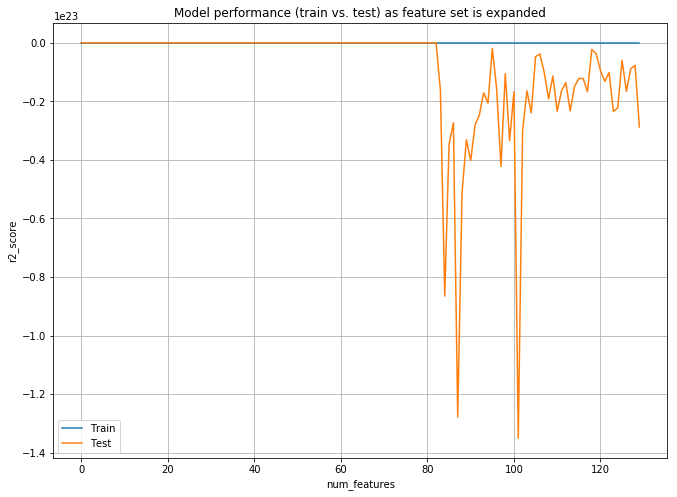

In [192]:
plt.figure(figsize=(11,8))
plt.plot(train_r2_ls[:130],label="Train")
plt.plot(test_r2_ls[:130],label="Test")
plt.grid(axis='both')
plt.legend()

ax = plt.gca()
xlab = ax.set_xlabel("num_features")
ylab = ax.set_ylabel("r2_score")
t = ax.title.set_text("Model performance (train vs. test) as feature set is expanded")

In [193]:
max(test_r2_ls)

0.8103619450593735

We can see that feature selection through random forest does not help much on this much. We achieved around 82% `r2_score`.

### **Next steps**

1. try `lasso` to select features, and feed the best into a random forest
2. try using euclidean distance to reduce feature set (this is in `indoorplants.analysis.features`) and test results

#### Lasso: L1 regularization

Objective = RSS + alpha * (sum of absolute value of coefficients)

`alpha` = 0 -> OLS

`alpha` = ∞ -> coefficients to 0

First of all, we need to find a best Lasso model, which means a best `alpha`

In [194]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(for_modeling_df[X])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [195]:
# Create lasso regression with possible alpha values
regr_cv = LassoCV(alphas=np.linspace(1,1000,100),cv=5,max_iter=10e5)
# Fit the linear regression
model_cv = regr_cv.fit(X_std, for_modeling_df[y].SalePrice)
# View alpha
model_cv.alpha_


1000.0

In [196]:
coef = pd.Series(model_cv.coef_, index = for_modeling_df[X].columns)
imp_coef = abs(coef.iloc[coef.nonzero()[0]]).sort_values(ascending=False)
imp_coef[0:10].index

Index(['GrLivArea', 'RoofMatl_ClyTile', 'OverallQual', 'Condition2_PosN',
       'TotalBsmtSF', 'BsmtFinSF1', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'Neighborhood_NoRidge', 'BsmtExposure_Gd'],
      dtype='object')

In [197]:
# Random forest top 10 
importances[:10].index

Index(['OverallQual', 'GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF1',
       'GarageArea', 'GarageCars', '1stFlrSF', 'LotArea', 'MasVnrArea'],
      dtype='object')

In [198]:
results = crossvalidate.cv_score(model_obj=RandomForestRegressor(n_estimators = 100),
                                 X=for_modeling_df[imp_coef[:10].index],
                                 y=for_modeling_df[y].SalePrice,
                                 score_funcs=r2_score,
                                 random_state=0,
                                 splits = 10)

In [199]:
results

mean       std
r2_score train  0.973424  0.002541
         test   0.807866  0.108462

In [200]:
train_lasso_ls = []
test_lasso_ls = []
for i in np.arange(1,len(imp_coef),10):
    results = crossvalidate.cv_score(model_obj=RandomForestRegressor(n_estimators = 100),
                                 X=for_modeling_df[imp_coef[:i].index],
                                 y=for_modeling_df[y].SalePrice,
                                 score_funcs=r2_score,
                                 random_state=0,
                                 splits = 10)
    train_r2 = results['mean'][0]
    test_r2 =  results['mean'][1]
#     print(train_r2)
    train_lasso_ls.append(train_r2)
    test_lasso_ls.append(test_r2)


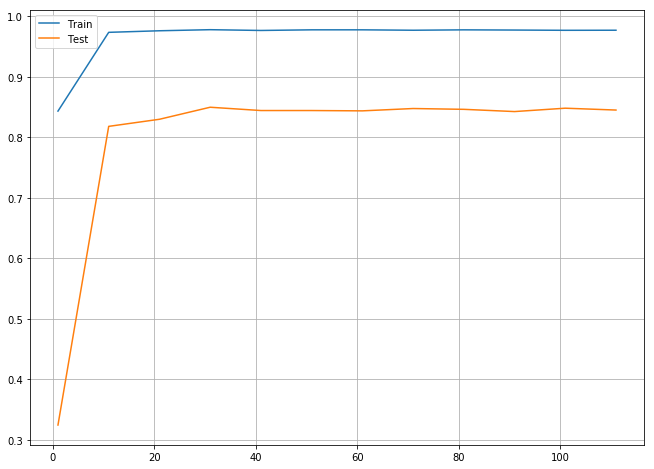

In [201]:
x = np.arange(1,len(imp_coef),10)
plt.figure(figsize=(11,8))
plt.plot(x,train_lasso_ls,label="Train")
plt.plot(x,test_lasso_ls,label="Test")
plt.grid(axis='both')
plt.legend()


In [202]:
max(test_lasso_ls)

0.849808199513683

#### Euclidean distance: L2 Norm

In [203]:
def euclid(df):
    return np.sqrt((df[0] - df[1]).pow(2).sum())

In [204]:
pd.DataFrame(list(zip([1, 2, 3 ], [4, 5, 6]))).corr().loc[0, 1]

1.0

In [205]:
euclid(pd.DataFrame(list(zip([1, 2, 3 ], [4, 5, 6]))))

5.196152422706632

In [206]:
pd.DataFrame(list(zip([1, 2, 3 ], [4, -3, 3]))).corr().loc[0, 1]

-0.1320676359488436

In [207]:
euclid(pd.DataFrame(list(zip([1, 2, 3 ], [4, -3, 3]))))

5.830951894845301

In [208]:
from indoorplants.analysis import features

In [209]:
euclids = features.euclidean_distances(for_modeling_df[X], X)

In [210]:
euclids.shape

(179700, 1)

In [211]:
euclids

euclidean_distances
feature_one         feature_two                             
Utilities_AllPub    Utilities_NoSeWa               34.146742
Street_Grvl         Street_Pave                    34.146742
CentralAir_N        CentralAir_Y                   34.146742
Utilities_AllPub    Heating_Floor                  34.132096
                    Condition2_PosA                34.132096
                    Condition2_RRNn                34.132096
                    YearBuilt_1872                 34.132096
                    Exterior1st_ImStucc            34.132096
                    MiscFeature_TenC               34.132096
                    Condition2_RRAe                34.132096
                    SaleType_Con                   34.132096
                    YearBuilt_1913                 34.132096
                    PoolQC_Fa                      34.132096
                    YearBuilt_1904                 34.132096
                    YearBuilt_1893                 34.132096
PoolArea            PoolQC_NA                      34.124330
Utilities_AllPub    Heating_OthW                   34.117444
                    RoofMatl_Roll                  34.117444
                    HeatingQC_Po                   34.117444
                    Exterior1st_AsphShn            34.117444
                    RoofMatl_Metal                 34.117444
                    GarageYrBlt_1947_0             34.117444
                    YearBuilt_1882                 34.117444
                    ExterCond_Po                   34.117444
                    Exterior1st_CBlock             34.117444
                    GarageYrBlt_1934_0             34.117444
                    GarageCond_Ex                  34.117444
                    MiscFeature_Gar2               34.117444
                    Condition2_RRAn                34.117444
                    Condition2_PosN                34.117444
...                                                      ...
Condition2_RRNn     SaleType_Con                    0.000000
Condition2_PosA     YearBuilt_1893                  0.000000
YearBuilt_1904      YearBuilt_1913                  0.000000
Condition2_PosA     YearBuilt_1904                  0.000000
Condition2_RRNn     YearBuilt_1872                  0.000000
YearBuilt_1913      Exterior1st_ImStucc             0.000000
Condition2_RRNn     YearBuilt_1893                  0.000000
                    YearBuilt_1904                  0.000000
GarageType_NA       GarageQual_NA                   0.000000
Condition2_PosA     YearBuilt_1913                  0.000000
YearBuilt_1917      Heating_OthW                    0.000000
GarageType_NA       GarageFinish_NA                 0.000000
Condition2_RRNn     YearBuilt_1913                  0.000000
GarageType_NA       GarageYrBlt_NA                  0.000000
YearBuilt_1952      YearRemodAdd_1952               0.000000
Condition2_RRNn     Exterior1st_ImStucc             0.000000
                    MiscFeature_TenC                0.000000
                    Heating_Floor                   0.000000
YearBuilt_1893      YearBuilt_1904                  0.000000
Exterior1st_ImStucc PoolQC_Fa                       0.000000
Condition2_PosA     Exterior1st_ImStucc             0.000000
YearBuilt_1872      SaleType_Con                    0.000000
PoolQC_Fa           SaleType_Con                    0.000000
YearBuilt_1872      MiscFeature_TenC                0.000000
PoolQC_Fa           MiscFeature_TenC                0.000000
Exterior1st_ImStucc MiscFeature_TenC                0.000000
YearBuilt_1893      YearBuilt_1913                  0.000000
Condition2_RRNn     PoolQC_Fa                       0.000000
YearBuilt_1872      PoolQC_Fa                       0.000000
GarageType_NA       GarageCond_NA                   0.000000

[179700 rows x 1 columns]

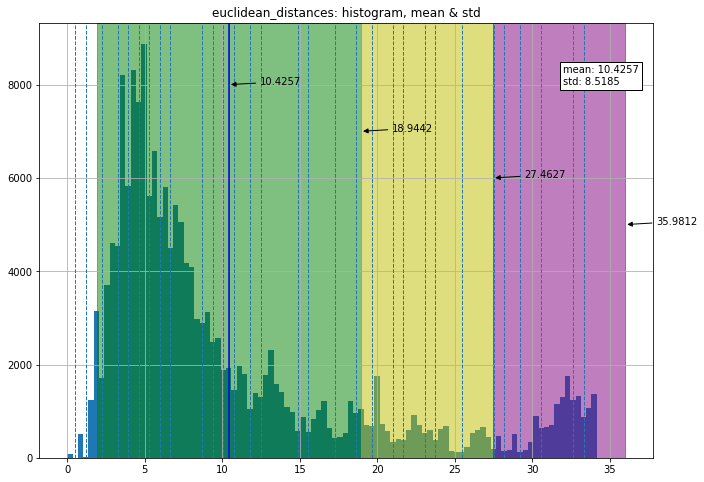

In [212]:
ax = exploratory.center_scale_with_peak_trough(euclids.euclidean_distances)

In [213]:
redundants = features.get_redundant_feature_pairs(euclids.euclidean_distances, 10)

In [214]:
redundants.head()

,feature_one,feature_two
0,MiscVal,BsmtExposure_Gd
1,2ndFlrSF,YearRemodAdd_1965
2,LotFrontage,SaleType_New
3,OpenPorchSF,BsmtExposure_Gd
4,LotFrontage,Neighborhood_Gilbert


In [215]:
non_redundants = set(X) - set(redundants.feature_two)

In [216]:
len(X)

600

In [217]:
len(non_redundants)

75

In [218]:
non_redundants = list(non_redundants)

In [219]:
results = crossvalidate.cv_score(model_obj=RandomForestRegressor(n_estimators = 100, max_depth=8),
                                 X=for_modeling_df[non_redundants],
                                 y=for_modeling_df[y].SalePrice,
                                 score_funcs=r2_score,
                                 random_state=0,
                                 splits=5)

In [220]:
results

mean       std
r2_score train  0.930107  0.003266
         test   0.715847  0.062177

**Next steps**
- can you make a function to return a `DataFrame` with the non-redundant features (see above)?
- I think there is a ticket in indoorplants issues for this

In [221]:
def remove_redundant_features(table, threshold):
    
    euclids = features.euclidean_distances(table, table.columns)
    
    redundants = features.get_redundant_feature_pairs(euclids.euclidean_distances,threshold)

    feature_two = set(redundants.feature_two.unique())
    nonredundants = list(set(table.columns) - set(feature_two))

    return table[nonredundants].copy()

In [222]:
df = remove_redundant_features(for_modeling_df[X],10)

In [223]:
df.head()

,YrSold_2007,Exterior1st_HdBoard,MasVnrType_None,LotFrontage,LotShape_Reg,GarageType_Attchd,Foundation_CBlock,YearRemodAdd_1950,MasVnrType_BrkFace,BsmtFinType1_BLQ,...,BsmtQual_Gd,Fence_MnPrv,BsmtExposure_No,GarageType_Detchd,BsmtQual_TA,BsmtFinType1_Unf,GarageFinish_Unf,GarageQual_TA,YrSold_2008,HouseStyle_2Story
1170,0,0,1,76.0,1,1,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
75,0,0,1,21.0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
390,0,0,1,50.0,1,0,0,1,0,0,...,0,1,1,1,1,0,1,1,1,0
1282,0,0,1,94.0,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
682,0,0,1,0.0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0


In [224]:
results = crossvalidate.cv_score(model_obj=RandomForestRegressor(n_estimators = 100, max_depth=8),
                                 X=df,
                                 y=for_modeling_df[y].SalePrice,
                                 score_funcs=r2_score,
                                 random_state=0,
                                 splits=5)

In [225]:
results


mean       std
r2_score train  0.929098  0.002631
         test   0.729466  0.055372

The Euclidean method to select features helps us to achieved 73.7% of `r2_score`. This is still not as good as random forest regression with lasso selected features.

# 5. Predict `SalePrice` for test.csv

After all of the analysis above, I decided to use lasso to select features and then use random forest classifier to predictt `SalePrice`.

I will use the first 30 important features to feed the random forest regression.

In [226]:
table_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [228]:
def get_test_data(table,categorical,numerical):
    cols = categorical+numerical
    for_testing = table[cols]
    
    to_dummy = categorical

    return pd.get_dummies(for_testing, columns=to_dummy)

In [229]:
for_testing = get_test_data(table_test,categorical,numerical)

In [231]:
for_testing.shape

(1459, 584)

In [245]:
ls1 = for_testing.columns.values

In [246]:
ls2= imp_coef[:35].index.values

In [247]:
test_features = []
for i in range(len(ls2)):
    if ls2[i] in ls1:
        test_features.append(ls2[i])

In [248]:
test_features

['GrLivArea',
 'OverallQual',
 'Condition2_PosN',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'BsmtQual_Ex',
 'KitchenQual_Ex',
 'Neighborhood_NoRidge',
 'BsmtExposure_Gd',
 'GarageCars',
 'ExterQual_Ex',
 'OverallCond',
 'LotArea',
 'BldgType_1Fam',
 'PoolQC_Ex',
 'RoofMatl_WdShngl',
 'Neighborhood_NridgHt',
 'MasVnrArea',
 'Neighborhood_StoneBr',
 'SaleType_New',
 'Functional_Typ',
 'ExterQual_TA',
 'Condition1_Norm',
 'HeatingQC_Ex',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'KitchenAbvGr',
 'BsmtExposure_No',
 'Neighborhood_Somerst',
 'SaleCondition_Abnorml',
 'MSZoning_C (all)',
 'GarageArea']

In [250]:
for_testing[test_features].head()

,GrLivArea,OverallQual,Condition2_PosN,TotalBsmtSF,BsmtFinSF1,BsmtQual_Ex,KitchenQual_Ex,Neighborhood_NoRidge,BsmtExposure_Gd,GarageCars,...,Condition1_Norm,HeatingQC_Ex,MSZoning_RM,Neighborhood_Crawfor,KitchenAbvGr,BsmtExposure_No,Neighborhood_Somerst,SaleCondition_Abnorml,MSZoning_C (all),GarageArea
0,896,5,0,882.0,468.0,0,0,0,0,1.0,...,0,0,0,0,1,1,0,0,0,730.0
1,1329,6,0,1329.0,923.0,0,0,0,0,1.0,...,1,0,0,0,1,1,0,0,0,312.0
2,1629,5,0,928.0,791.0,0,0,0,0,2.0,...,1,0,0,0,1,1,0,0,0,482.0
3,1604,6,0,926.0,602.0,0,0,0,0,2.0,...,1,1,0,0,1,1,0,0,0,470.0
4,1280,8,0,1280.0,263.0,0,0,0,0,2.0,...,1,1,0,0,1,1,0,0,0,506.0


In [251]:
rfr = RandomForestRegressor(n_estimators=100)
rfr = rfr.fit(for_modeling_df[test_features], for_modeling_df[y].SalePrice)


In [254]:
predicted_price = rfr.predict(for_testing[test_features])

Text(0.5, 1.0, 'Predicted Sales Price')

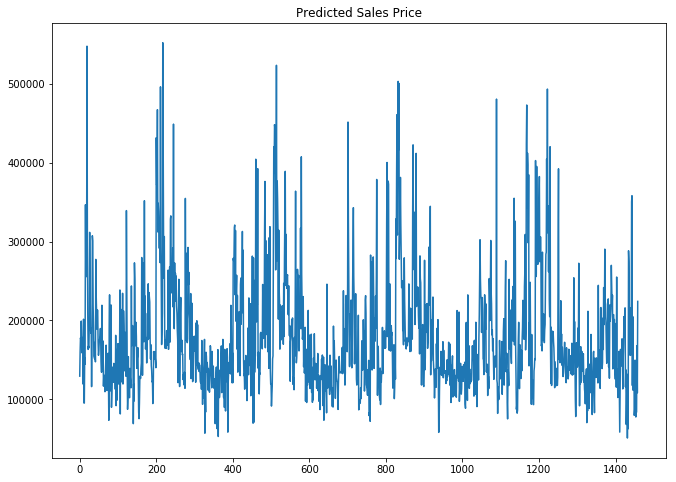

In [257]:
plt.figure(figsize=(11,8))
plt.plot(predicted_price)
plt.title("Predicted Sales Price")

# 6. Conclusion

In this project, I applied machine learning regression techniques to predict the `SalePrice` of houses given some features of the house. 

There are mainly 5 steps in this project:

    Step 1: data preporcessing
    
        In this section, I foucus on understanding the shape of the dataset, the type of festures, as well as the dealing with data quality issues (duplicate data, missing values).
        
    Step 2:  Exploratory Data Analysis
    
           
   
       
        